# Video Game Analysis

This report will identify patterns that determine whether a game succeeds or not by looking at the different platforms, genres, sales per region and ESRB rating.

### Table of contents:

 - [General Information](#Info)
 
         General Information about the dataset
      
 - [Data Reprocessing](#Data)
 
         Preparing the data for analysis
      
 - [Analysing Data](#Ana)
 
         Use of data analysis methods to examine the data
     
 - [Hypothesis Testing](#Hyp)
 
         Test the statistical significance of the data
     
 - [Final Conclusion](#Con)
 
         Final conclusion that will assess which factors determine if a game succeeds

## General Information <a class="anchor" id="Info"></a>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt
games = pd.read_csv('/datasets/games.csv')
display(games)
games.info()
display(games.describe())
duplicates =  games[games.duplicated()]
print(duplicates) 

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Empty DataFrame
Columns: [Name, Platform, Year_of_Release, Genre, NA_sales, EU_sales, JP_sales, Other_sales, Critic_Score, User_Score, Rating]
Index: []


## Conclusion
Using pandas to read the csv file. Then checking there are no duplicate rows, which there are not. Using the describe method, checking for any outlier values in the dataset.

## Data Reprocessing <a class="anchor" id="Data"></a>

In [2]:

games.columns = games.columns.str.lower()

games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce').astype(float)


   
num_var = games.columns[games.dtypes != 'object']
cat_var = games.columns[games.dtypes == 'object']

print('Missing values in interger columns: \n',games[num_var].isnull().sum())

print('Missing values in object columns: \n',games[cat_var].isnull().sum())


    
yor= games.groupby(['name','genre'])['year_of_release'].transform('median')
games['year_of_release'] = games['year_of_release'].fillna(yor)
games['year_of_release'] = games['year_of_release'].round()

print('New missing values in interger columns: \n',games[num_var].isnull().sum())

print('New missing values in object columns: \n',games[cat_var].isnull().sum())

games['year_of_release']= games['year_of_release'].dropna().astype(int)
games.info()   
    
sale = games['na_sales'] + games['eu_sales'] + games['jp_sales']+ games['other_sales']
games['total_sales'] = sale
games

Missing values in interger columns: 
 year_of_release     269
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
dtype: int64
Missing values in object columns: 
 name           2
platform       0
genre          2
rating      6766
dtype: int64
New missing values in interger columns: 
 year_of_release     146
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
dtype: int64
New missing values in object columns: 
 name           2
platform       0
genre          2
rating      6766
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16569 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_s

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


## Conclusion
Firstly, the column names needed to be lower case, which was done using str.lower(). Then the data type for user_score needed to change as not all the user scores were interger values, similarly to critic scores. Changing it to float would provide a more accurate value of user score. For the Year of release column, years are measured in full, so need to change years that are not full intergers. 

There were missing values for genre, year of release, critic score, user score and rating. Some reasons for missing values is the age of the game. The older the games are the less traceable scores and ratings are since they would have been written in print rather than online, which is easier to lose. For genre and year of release that could have been an input error.
To fill most of those values a groupby method was used to group together features that would create an accurate picture for the missing values. Then used this to create a median value that is inputted into the missing values. Median values were used as they are more accurate than mean values that can be skewed by outliers. Although not all the values were filled. For the tbh cases, I turned it into NaN. This is because they have no value and I cannot use it as such. 


## Analysing Data <a class="anchor" id="Ana"></a>

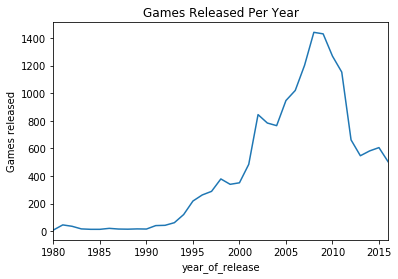

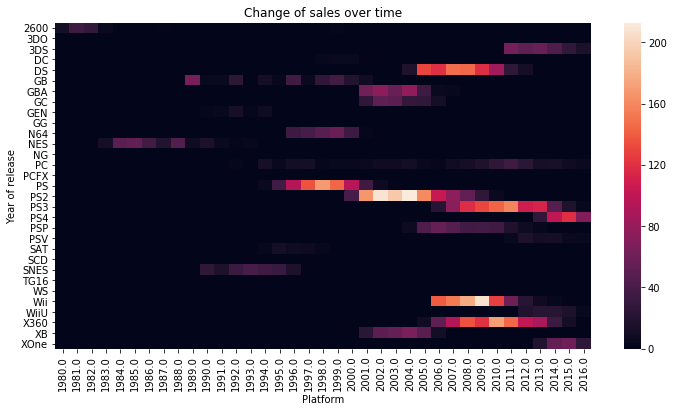

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
Name: total_sales, dtype: float64


In [3]:

years= games.groupby(['year_of_release']).size().plot()
years.plot()
plt.ylabel('Games released')
plt.title('Games Released Per Year')
plt.show()

before = games.groupby(['platform','year_of_release'])['total_sales'].sum()
change = before.unstack().fillna(0)
plt.figure(figsize=(12,6))
sns.heatmap(change)
plt.xlabel('Platform')
plt.ylabel('Year of release')
plt.title('Change of sales over time')
plt.show()


platform =  games.groupby(['platform'])['total_sales'].sum()
print(platform.sort_values(ascending=False).head())



## Conclusion
The line graph shows not every period signficant. Before 1994 not enough games released to complete proper anaylsis. Makes sense with the limited amount of platforms as technology was not as advanced as it is currently.
To have a better idea of what takes a game to succeed in light on competition, best to use releases from 2002 and beyond,there alot more competition from the multitude of different releases. It is best to use data from 2014 onwards as that is when there was a large increase in the amount of games present.
The heatmap shows that the life cycle of platforms can range from around 5-10 years depending on the speed of technological advancements. Platforms like the PS2 which were very popular from 2000-2009 now have zero sales but this is due to updated versions of the old platforms that have replaced them. Games are not produced for those old platforms anymore, so they end up with zero sales. However the platforms with the greatest total sales are the PS2, X360,PS3,Wii and DS.

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


'Platforms with the highest sales '

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.40
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64

'Highest selling platforms by most recent date'

year_of_release  platform
2016.0           XOne        26.15
                 X360         1.52
                 WiiU         4.60
                 Wii          0.18
                 PSV          4.25
                 PS4         69.25
                 PS3          3.60
                 PC           5.25
                 3DS         15.14
2015.0           XOne        60.14
Name: total_sales, dtype: float64

'Highest selling platforms of all dates'

year_of_release  platform
2015.0           PS4         118.90
2014.0           PS4         100.00
2016.0           PS4          69.25
2015.0           XOne         60.14
2014.0           XOne         54.07
                 PS3          47.76
                 3DS          43.76
                 X360         34.74
2015.0           3DS          27.78
2016.0           XOne         26.15
Name: total_sales, dtype: float64

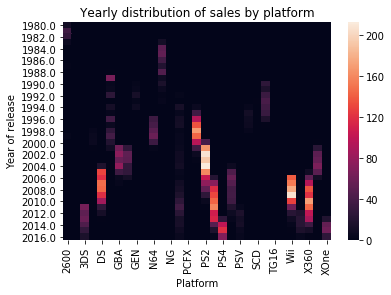

In [4]:
new = games.query('year_of_release >= 2014')
display(new)
ypts = new.groupby(['year_of_release','platform'])['total_sales'].sum()
pts = new.groupby(['platform'])['total_sales'].sum()

display('Platforms with the highest sales ',pts.sort_values(ascending=False).head(10))

display('Highest selling platforms by most recent date',ypts.sort_index(ascending=False).head(10))

display('Highest selling platforms of all dates',ypts.sort_values(ascending=False).head(10))

old_ypts =games.groupby(['year_of_release','platform'])['total_sales'].sum()

dfp = old_ypts.unstack().fillna(0)
sns.heatmap(dfp)
plt.xlabel('Platform')
plt.ylabel('Year of release')
plt.title('Yearly distribution of sales by platform')

plt.show()

## Conclusion
The biggest platforms ever are PS2, X360,PS3 WII,DS and PS by total sales of games, however issue with them being old platforms is that it is hard to see if there success is representative of the what trends would look like today to see if a game succeeds or not. If we look at most current date the XOne,PS4,3DS still stand so those platforms are the most important but more recent popular platforms XOne and WIIU will be included of total sales of games. The heatmap shows that in their prime the PS2 and Wii has the highest year distribution of sales in any other platform. Thus, as a consistent high performer despite being more outdated, including the PS2 is important as it can still give good insight.Older platforms see lower total sales over time compared to never platforms. This could have important implications to the final conclusion if it is not taken into account.

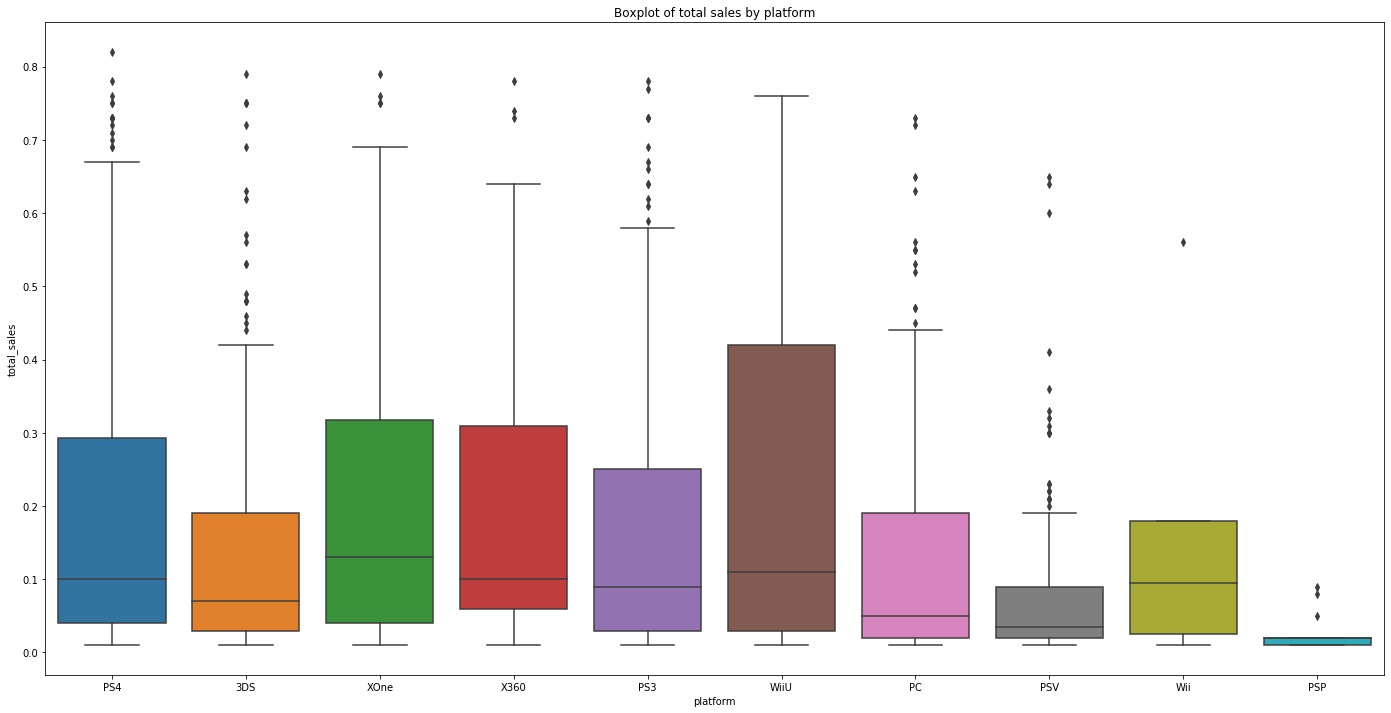

In [5]:

def filtt(data):
    h = data
    Q1= new[data].quantile(0.25)
    Q3 = new[data].quantile(0.75)
    IQR = Q3- Q1
    return IQR,Q3,Q1
IQR1,Q31,Q11=filtt('total_sales')
filteredss = new.query('(@Q11 - 1.5 * @IQR1) <= total_sales <= (@Q31 + 1.5 * @IQR1)')
plt.figure(figsize=(24,12))
plt.title('Boxplot of total sales by platform')
sns.boxplot(x=filteredss['platform'], y=filteredss['total_sales']);


## Conclusion
This is  a box plot for the global sales of all games,broken down by platform. Large outlier so data needed to be filtered. The average sales across platforms were not all too different from each other, with N64 and GB having the highest avergaer total sales of all games. However, the similarity in total sales ends when looking at right tail for each platform. This varies widly depending on the platform and could be the result of other things such as exclusive games on certain platforms or the general success of franchices that are across mutliple platforms. 

Top selling games:
 name
Call of Duty: Black Ops 3              25.67
Call of Duty: Advanced Warfare         21.97
Grand Theft Auto V                     19.26
FIFA 15                                17.37
FIFA 16                                16.30
Minecraft                              14.98
Fallout 4                              12.67
Destiny                                12.54
Super Smash Bros. for Wii U and 3DS    12.42
Star Wars Battlefront (2015)           12.19
Name: total_sales, dtype: float64

 The top selling games that are on a multitude of platforms: 
 Grand Theft Auto V, Call of Duty: Black Ops , Call of Duty: Modern Warfare 3


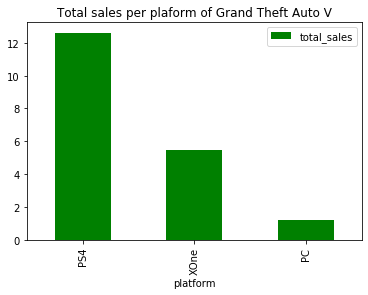

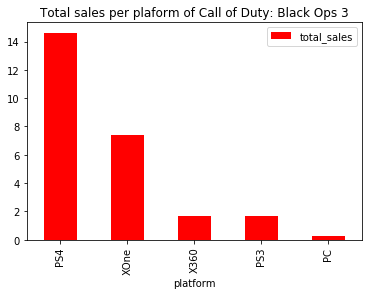

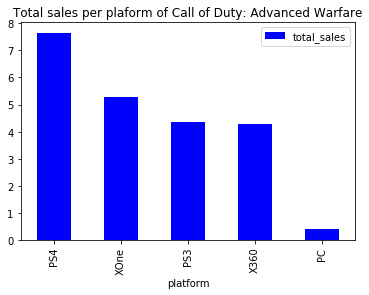

Correlation between User and Critic reviews
0.5632539077472504


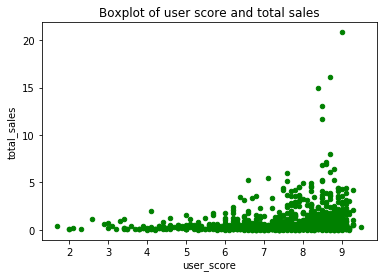

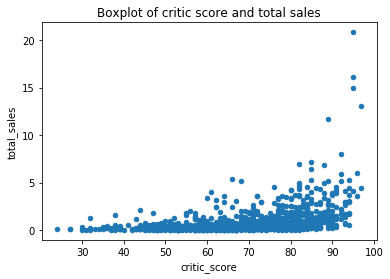

In [6]:

top_game= new.groupby('name')['total_sales'].sum().sort_values(ascending=False)
print('Top selling games:\n',top_game.head(10))
print('\n The top selling games that are on a multitude of platforms: \n Grand Theft Auto V, Call of Duty: Black Ops , Call of Duty: Modern Warfare 3')
top_g= new[new['name']== 'Grand Theft Auto V']
top_c= new[new['name']== 'Call of Duty: Black Ops 3']
top_cm= new[new['name']== 'Call of Duty: Advanced Warfare']

def comp(game,name,color):
    game.plot(kind='bar',x='platform',y='total_sales', color= color)
    plt.title('Total sales per plaform of '+ name)
    plt.show()
comp(top_g,'Grand Theft Auto V', 'green')
comp(top_c, 'Call of Duty: Black Ops 3','red')
comp(top_cm,'Call of Duty: Advanced Warfare','blue')


p = games[games['platform']== 'PS2']
print('Correlation between User and Critic reviews')
print(p['user_score'].corr(p['critic_score']))


p.plot(x='user_score', y='total_sales',kind='scatter', color='green')
plt.title(label="Boxplot of user score and total sales")
plt.show()

p.plot(x='critic_score', y='total_sales',kind='scatter')
plt.title(label="Boxplot of critic score and total sales")
plt.show()



## Conclusion

Comparing the sales of the same games on other platforms, it is clear that in the cases of Call of Duty and GTA the most popular platforms are PS4 and XOne. This could be because the year that these games were released meant it was optimal for those platforms or the fact that they are the most popular platforms, thus most people will get their games for those platforms.

Looking at how user and professional reviews affect sales for one popular platform, PS2 platform was chosen because it has the highest total sales of games for any platform. It would provide an important insight.Firstly the correlation coeffiecient shows there is a fairly strong postive relationship between critic and user reviews. So, it must follow that the trend between
critic reviews and sales, should follow for users. Mainly because users,by games following critic reviews and reccomendations, so practically thisholds. The scatter plots show as review score increases, the total salesof the game increases. This makes sense as people would want to play the best games rated as such.




These are the highest selling genres:
  genre
Action          199.71
Shooter         170.94
Sports          109.48
Role-Playing    101.44
Misc             37.55
Name: total_sales, dtype: float64

These are the highest selling genres per platform:
  genre         platform
Action        PS4         91.62
Shooter       PS4         78.46
              XOne        55.39
Sports        PS4         50.01
Role-Playing  3DS         40.02
                          ...  
Adventure     PSP          0.05
Simulation    PSV          0.05
Puzzle        PS3          0.04
Misc          PSP          0.02
Puzzle        PS4          0.02
Name: total_sales, Length: 96, dtype: float64


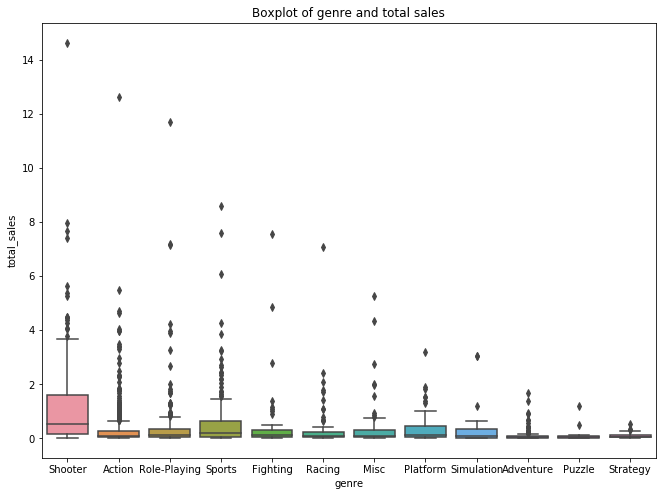

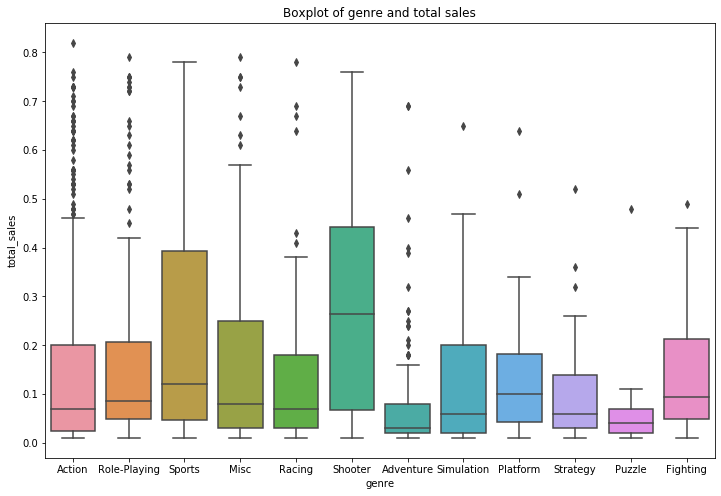

In [7]:

plt.figure(figsize=(11,8))
plt.title(label="Boxplot of genre and total sales")
sns.boxplot(x=new['genre'], y=new['total_sales']);
high_g= new.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
print('These are the highest selling genres:\n ',high_g.head(5))
high_g_p= new.groupby(['genre','platform'])['total_sales'].sum().sort_values(ascending=False)
print('\nThese are the highest selling genres per platform:\n ',high_g_p)



plt.figure(figsize=(12,8))
plt.title(label="Boxplot of genre and total sales")
sns.boxplot(x=filteredss['genre'], y=filteredss['total_sales']);


## Conclusion

Looking at the general distribution of games by genre to total sales by boxplot. An Outlier was alterating the look of the graph, including a filtered version of total sales that fits IQR range.
Shooter, action and sports have the highest average sales via medium , however shooter has the largest range in the 75% quartile regarding total sales. For action games alot of a fair amount of values lie above boxplot range, there is alot of outliers. Factors like game title and franchise is  important to a genres success as it could be different sales of shooter games over different titles. There is also another factor of platforms as well, the magnitude of outliers could be a result of the varying success of the different platforms and thus the success of the games. Strategy and adventure games are interesting that even though they have low sales in the boxplot, compared to any other genre they have the largest range of outlers that spread
wider than their boxplot does, only a small section of those games have seen success similar to shooter, sports or action games.

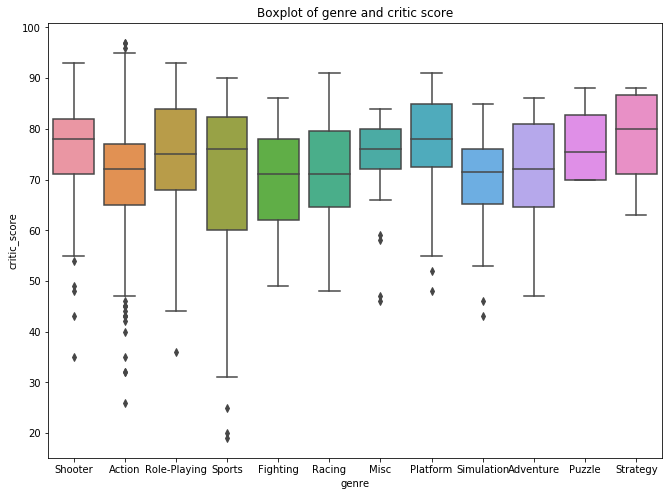

In [8]:
plt.figure(figsize=(11,8))
plt.title(label="Boxplot of genre and critic score")
sns.boxplot(x=new['genre'], y=new['critic_score']);


## Conclusion
As shown by the scatter plot there is a positive correlation between total sales and critic score.To see if this is true with genre took boxplot with genre and critic score. For the popular genres like sports, has the highest average critic score compared to all other genres. This is paritally true for shooter genre as well as it is inline with the highest scoring genres. However with action, it has the lowest average score but largest range of critic score values, with a long left tail. Hence even though action is the highest selling genre it isn't rated the best via critics. This suggests there are other crucial factors to 
consider when looking at what makes a game successful.

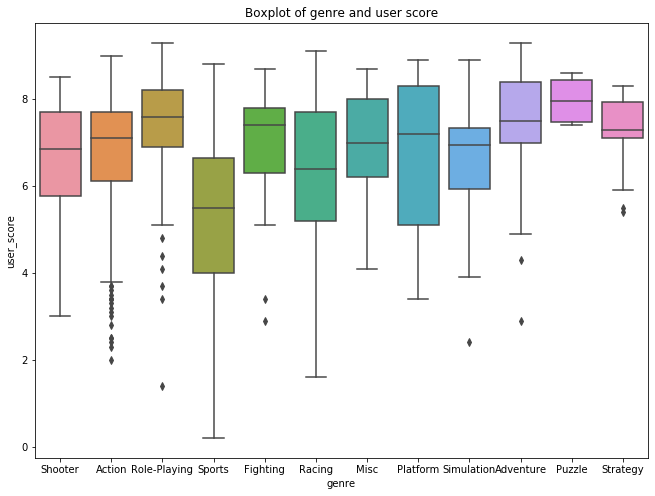

In [9]:
plt.figure(figsize=(11,8))
plt.title(label="Boxplot of genre and user score")
sns.boxplot(x=new['genre'], y=new['user_score']);


## Conclusion
As shown previously there is a correlation between user and critic scores, so a boxplot on user scores to genre was done to affirm the result of critic score to genre boxplot.

Most profitable genres by far action,shooter and sports, this is consistent overall but along with different platforms top selling games on the different platforms, wii sports, cod and gta are in one of those three categories so it makes sense.
Low sales are less graphically stimulating games like strategy and puzzle. Also looking at the platforms they typically resonate with older platforms as well such as DS, GB. Highlights shift of more games on newer platforms satifising one of the three top genres.

Top five platforms for each region:



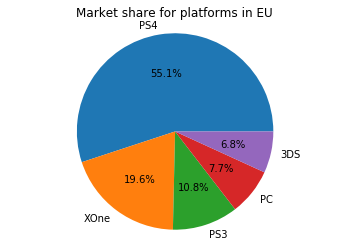

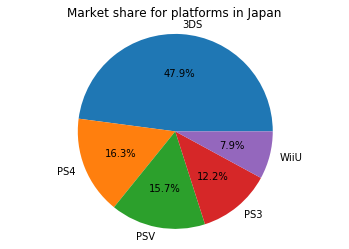

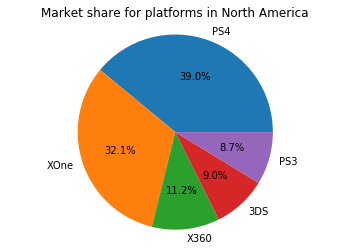


Top five genres for each region:



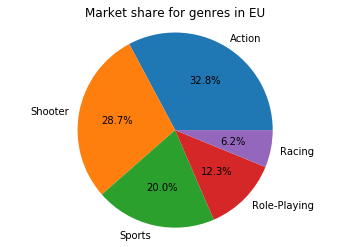

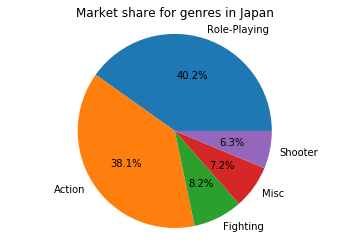

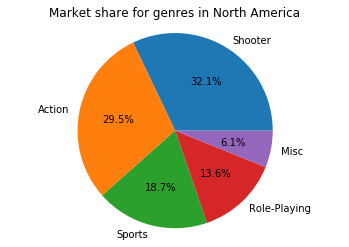


ESRB rating and sales per region:



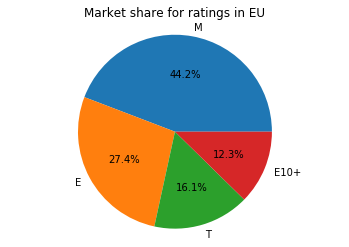

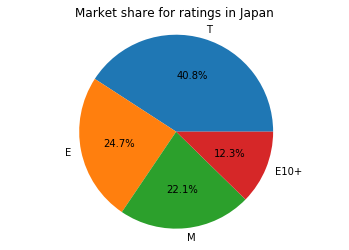

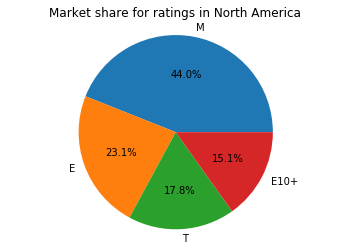

In [10]:

def market_share(factor, region, name):
    na = new.groupby([factor])[region].sum().sort_values(ascending=False).head(5)
    labels = '{}'.format(na.index[0]), '{}'.format(na.index[1]), '{}'.format(na.index[2]), '{}'.format(na.index[3]),'{}'.format(na.index[4])
    sizes = [na[0], na[1], na[2], na[3], na[4]]
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
    ax1.axis('equal')
    plt.title(label= 'Market share for {}s in {}'.format(factor, name))
    plt.show()
print('\033[1m'+'Top five platforms for each region:\n')
market_share('platform','eu_sales', 'EU') 
market_share('platform','jp_sales', 'Japan')
market_share('platform','na_sales', 'North America')

print('\033[1m'+'\nTop five genres for each region:\n')
market_share('genre','eu_sales', 'EU')
market_share('genre', 'jp_sales', 'Japan')
market_share('genre', 'na_sales', 'North America')

def market_sharess(factor, region, name):
    na = new.groupby([factor])[region].sum().sort_values(ascending=False).head(5)
    labels = '{}'.format(na.index[0]), '{}'.format(na.index[1]), '{}'.format(na.index[2]), '{}'.format(na.index[3])
    sizes = [na[0], na[1], na[2], na[3]]
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
    ax1.axis('equal')
    plt.title(label= 'Market share for {}s in {}'.format(factor, name))
    plt.show()
print('\033[1m'+'\nESRB rating and sales per region:\n')
market_sharess('rating','eu_sales', 'EU')
market_sharess('rating', 'jp_sales', 'Japan')
market_sharess('rating', 'na_sales', 'North America')


## Conclusion
The market share for each region is similar in that PS4 is one of the top platforms. However, apart from that they differ with EU and North America  having the largest market share for the PS4, while Japan is the 3DS . In terms of popular genres, EU and North America are similar in there top genres being shooter, action and sports which follows the result in the genre analysis and makes sense considering their most popular platforms. Japan however,has its significantly top genre of role-playing, action coming a close second. ESRB ratings do affect sales in all regions. The rating that has the highest market share is M, meaning mature. Thus, games that EU and North America have a mature rating. This coincides with the highest selling games of Call of Duty and GTA being M rated games. However, in Japan a T rating has the highest market share meaning that a large number of games sold had a teen rating.

## Hypothesis Testing <a class="anchor" id="Hyp"></a>

In [11]:
print('Null hypothesis: Average user ratings of the Xbox One and PC platforms are the same.')
print('Alternative hypothesis: Average user ratings for the Action and Sports genres are different.')

alpha= 0.05

xbox = new[new['platform']== 'XOne']
PC = new[new['platform']== 'PC']
xu= xbox.dropna()['user_score']
pu = PC.dropna()['user_score']

results = st.ttest_ind(xu, pu)
print('p-value : {}'.format(results.pvalue))
if (results.pvalue < alpha):
    print("We reject the null hypothesis that the average user ratings of the Xbox One and PC platforms are the same.")
    print('\nMean user ratings of Xbox one platform:\n',xu.mean(),'\n','\nMean user ratings of PC platform:\n',pu.mean())
    print('\n')
else:
        print("We can't reject the null hypothesis that the average user ratings of the Xbox One and PC platforms are the same.")

        print('\n')

Null hypothesis: Average user ratings of the Xbox One and PC platforms are the same.
Alternative hypothesis: Average user ratings for the Action and Sports genres are different.
p-value : 0.16263338587940837
We can't reject the null hypothesis that the average user ratings of the Xbox One and PC platforms are the same.




In [12]:
print('Null hypothesis: Average user ratings for Action and Sports genres are the same')
print('Alternative Hypothesis: Average user ratings for Action and Sports genres are different')

alpha=0.05
action = new[new['genre']== 'Action']
sports= new[new['genre']== 'Sports']
ac= action.dropna()['user_score']
sp = sports.dropna()['user_score']
results = st.ttest_ind(ac, sp)
print('\np-value : {}'.format(results.pvalue))
if (results.pvalue < alpha):
    print("We reject the null hypothesis that the average user ratings for Action and Sports genres are the same.")
    print('\nMean user ratings of Action games :\n',ac.mean(),'\n','\nMean user ratings of Sports games :\n',sp.mean())
    print('\n')
else:
        print("We can't reject the null hypothesis that the average user ratings for Action and Sports genres are same.")

        print('\n')


Null hypothesis: Average user ratings for Action and Sports genres are the same
Alternative Hypothesis: Average user ratings for Action and Sports genres are different

p-value : 1.6508179138625266e-09
We reject the null hypothesis that the average user ratings for Action and Sports genres are the same.

Mean user ratings of Action games :
 6.818918918918918 
 
Mean user ratings of Sports games :
 5.682278481012658




## Conclusion
Using the industry standard alpha of .05, the null hypothesis that XOne and PC platforms have the same average user rating. This was rejected, which signifies their ratings differ. In fact the mean user rating on PC are 1 point more than XOne platforms, however, this does not reflect total sales by platform. User ratings do not have much of an impact on which platform is chosen but maybe which games are bought on the platforms individually. 

With the same alpha of .05, the null hypothesis that the average user rating of action and sports genres are the same was rejected, signifiying that they are different. This makes sense considering the average user rating of action games is 1 point higher than sports games. However, considering there is a weak correlation between ratings and genre, this may not an important factor on what makes games succeed.

## Final Conclusion <a class="anchor" id="Con"></a>

What determines if a game succeeds or not is dependent on alot of factors. Firstly and most importantly, a game succeeds when it is on popular platforms. All the highest selling games were all on the popular platforms of their time and got the majority of there sales from those platforms. Within those platforms the genre of the game is also important. 

Typically shooter, action and sports games are the best performing consistently while puzzle and strategy, not so much. User and critic reviews are fairly important to whether a game succeeds but considering high reviews do not always align with top genres, this is not always important. The Japanese market is different in that it prefers role-playing games but the EU and North American market are similar in their tastes for sports,action and shooter games. 

Lastly a games ESRB rating is also of great importance to  its succession. Of EU and North American regions, games with an M rating (mature) have the highest market share, while Japan's highest market share is with T games. Thus, for a game to succeed it should cater mainly to mature audiences but also to teens in some aspect.